# Clean Leasing Company Google Reviews

Use this starter notebook to load raw data files.


In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns", 100)

## Load data

### Businesses and reviews

Read the CSV files. These are [Outscraper](https://outscraper.com/)'s scraped output. They contain Google reviews for leasing companies, apartment complexes, and student housing for three different campustowns.

- Brigham Young University (Provo, UT)
- Penn State University (University Park, PA)
- University of Illinois at Urbana Champaign (Champaign, IL)


## Load and Preprocess Data


### Businesses and Reviews

The main two tables are:

- `df_b`: List of property management companies or apartments
- `df_r`: Google reviews of the property management companies or apartments


In [3]:
df_b = pd.read_csv(
    "https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/businesses.csv"
)

df_b.head(3)


,campus,place_id,name,site,category,borough,street,city,postal_code,state,latitude,longitude,verified
0,Brigham Young University,ChIJqyXyo6GQTYcRXGfgeIpqc_I,Alpine Village,https://myalpinevillage.com/,Student housing center,Carterville,1378 Freedom Blvd 200 W,Provo,84604,Utah,40.252607,-111.661247,True
1,Brigham Young University,ChIJGbnTbamQTYcRtZfBrL52jhs,Palladium Apartments,https://www.palladiumprovo.com/,Housing complex,North Park,538 N Freedom Blvd Unit,Provo,84601,Utah,40.240917,-111.661714,True
2,Brigham Young University,ChIJaURIj6GQTYcRCY56AtxjTI4,Glenwood Apartments,https://glenwoodapt.com/,Student housing center,Carterville,1565 N University Ave,Provo,84604,Utah,40.254606,-111.659193,True


In [4]:
df_r = pd.read_csv(
    "https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/reviews.csv",
    parse_dates=["review_datetime_utc", "owner_answer_timestamp_datetime_utc"],
)

df_r.head(3)

,place_id,review_id,author_id,author_title,review_text,review_rating,review_img_url,review_datetime_utc,owner_answer,owner_answer_timestamp_datetime_utc,review_likes
0,ChIJqyXyo6GQTYcRXGfgeIpqc_I,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,100512067005706825621,Laura Brown,Service requests take a very long time to be r...,3,NaN,2023-10-24 12:46:43+00:00,"Dear Laura, \n\n We hear you loud and clear, t...",2023-10-24 14:56:01+00:00,0
1,ChIJqyXyo6GQTYcRXGfgeIpqc_I,ChZDSUhNMG9nS0VJQ0FnSUNwOUstOVpBEAE,102936107836751613731,Pete Haraguchi,I was thinking about giving two stars but I le...,1,https://lh5.googleusercontent.com/p/AF1QipPeIy...,2023-07-29 20:30:26+00:00,"Pete,\n\n Thank you for letting us know about ...",2023-07-29 22:46:48+00:00,12
2,ChIJqyXyo6GQTYcRXGfgeIpqc_I,ChZDSUhNMG9nS0VJQ0FnSURwbGZXTUJ3EAE,103835714740882872235,Jack Radford,DO NOT LIVE HERE. This was the WORST experienc...,1,NaN,2023-08-26 03:31:42+00:00,"Jack, \n\n I’m so sorry — it sounds like we re...",2023-08-26 04:56:04+00:00,3


### Tokens and Sentiments

Read the token list (through spaCy) and sentiment analysis results (using DistilBERT) so that you don't have to run the entire text analysis (which can take over an hour).

- The `df_tokens` file contains lemmatized tokens excluding stop words and punctuation.
- The `df_sentiments` file contains sentiment scores for each review.


In [5]:
df_tokens = pd.read_csv(
    "https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/tokens.csv.gz"
)

display(df_tokens.head(3))


,review_id,text,lemma,explain
0,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,Service,service,noun
1,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,requests,request,noun
2,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,long,long,adjective


In [6]:
df_sentiments = pd.read_csv(
    "https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/sentiments.csv"
)

display(df_sentiments.head(3))


,review_id,sentiment,score
0,ChdDSUhNMG9nS0VJQ0FnSUQ1OXRHZnNnRRAB,POSITIVE,0.909106
1,ChZDSUhNMG9nS0VJQ0FnSUNwOUstOVpBEAE,NEGATIVE,0.999216
2,ChZDSUhNMG9nS0VJQ0FnSURwbGZXTUJ3EAE,NEGATIVE,0.998690


In [7]:
import pandas as pd
import numpy as np
import plotly.express as px

# 1. Load all 4 data files
print("Loading data... please wait.")

df_b = pd.read_csv("https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/businesses.csv")
df_r = pd.read_csv("https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/reviews.csv", 
                   parse_dates=["review_datetime_utc", "owner_answer_timestamp_datetime_utc"])
df_tokens = pd.read_csv("https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/tokens.csv.gz")
df_sentiments = pd.read_csv("https://github.com/bdi475/datasets/raw/main/campustowns-leasing-company-reviews/results/sentiments.csv")

# 2. Merge Reviews with Businesses (to get Campus names)
# We use 'place_id' as the key
df_main = df_r.merge(df_b[['place_id', 'campus', 'name']], on='place_id', how='left')

# 3. Merge with Sentiments (to get Positive/Negative labels)
# We use 'review_id' as the key
df_main = df_main.merge(df_sentiments[['review_id', 'sentiment', 'score']], on='review_id', how='left')

print("Success! Data loaded. You can now run the Question 1 code.")

Loading data... please wait.
Success! Data loaded. You can now run the Question 1 code.


# Question 1. Which keywords (tokens) are associated with positive and negative sentiments? Are there any differences among the three campuses?

In [8]:
import pandas as pd
import plotly.express as px

# --- STEP 1: ROBUST DATA PREPARATION ---

# 1. Define the ALL target keywords (Updated to match Professor's list)
target_keywords = [
    'leak', 'deposit', 'elevator', 'manager', 'maintenance', 
    'pest', 'internet', 'parking', 'gym', 'pool', 
    'noise', 'package', 'cleaning', 'rent', 'tour', 
    'security' # Added to cover Security/Trespassing
]

# 2. Filter tokens for these keywords specifically
df_tokens_filtered = df_tokens[df_tokens['lemma'].isin(target_keywords)].copy()

# 3. Merge with Main Data
df_q1 = df_tokens_filtered.merge(df_main[['review_id', 'sentiment', 'campus', 'review_rating']], on='review_id', how='inner')

# 4. Filter for Binary Sentiment (Positive/Negative) for Bar Charts
df_binary = df_q1[df_q1['sentiment'].isin(['POSITIVE', 'NEGATIVE'])].copy()

# --- STEP 2: CALCULATE SORT ORDER ---
# Calculate Negative % for consistent sorting across all graphs
sort_data = df_binary.groupby(['lemma', 'sentiment']).size().unstack(fill_value=0)
sort_data['total'] = sort_data['POSITIVE'] + sort_data['NEGATIVE']
sort_data['neg_pct'] = (sort_data['NEGATIVE'] / sort_data['total']) * 100
master_sort_order = sort_data.sort_values('neg_pct', ascending=True).index.tolist()

# --- VISUAL 1: Global Sentiment Drivers (Thumbs Up/Down) ---

v1_counts = df_binary.groupby(['lemma', 'sentiment']).size().reset_index(name='count')
v1_totals = df_binary.groupby('lemma').size().reset_index(name='total')
v1_counts = v1_counts.merge(v1_totals, on='lemma')
v1_counts['percentage'] = (v1_counts['count'] / v1_counts['total']) * 100

# Create Labels
v1_counts['label'] = v1_counts.apply(lambda x: f"{'👍' if x['sentiment']=='POSITIVE' else '👎'} {x['percentage']:.1f}%", axis=1)

fig1 = px.bar(
    v1_counts, x='percentage', y='lemma', color='sentiment', orientation='h',
    title='<b>Visual 1: Global Sentiment Drivers</b><br><i>(Includes Security, Rent, Noise, Leaks, etc.)</i>',
    color_discrete_map={'NEGATIVE': '#EF553B', 'POSITIVE': '#00CC96'},
    text='label',
    category_orders={'lemma': master_sort_order} 
)
fig1.update_layout(xaxis=dict(range=[0, 100]), uniformtext_mode='hide', height=750)
fig1.show()

# --- VISUAL 2: Campus Comparison (Faceted Stacked Bars) ---

v2_counts = df_binary.groupby(['campus', 'lemma', 'sentiment']).size().reset_index(name='count')
v2_totals = df_binary.groupby(['campus', 'lemma']).size().reset_index(name='total')
v2_counts = v2_counts.merge(v2_totals, on=['campus', 'lemma'])
v2_counts['percentage'] = (v2_counts['count'] / v2_counts['total']) * 100
v2_counts['label'] = v2_counts['percentage'].round(0).astype(int).astype(str) + "%"

fig2 = px.bar(
    v2_counts, x='percentage', y='lemma', color='sentiment', 
    facet_col='campus', 
    orientation='h',
    title='<b>Visual 2: Campus Comparison</b><br><i>(Check "Security" and "Rent" across campuses)</i>',
    color_discrete_map={'NEGATIVE': '#EF553B', 'POSITIVE': '#00CC96'},
    text='label',
    category_orders={'lemma': master_sort_order}
)
fig2.update_layout(height=750, uniformtext_mode='hide') 
fig2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig2.show()

# --- VISUAL 3: Intensity Heatmap (Average Star Rating) ---

v3_data = df_q1.groupby(['campus', 'lemma'])['review_rating'].mean().reset_index()

fig3 = px.density_heatmap(
    v3_data, x='lemma', y='campus', z='review_rating',
    histfunc='avg',
    title='<b>Visual 3: Severity Heatmap</b><br><i>(How bad are the Security and Noise complaints?)</i>',
    color_continuous_scale='RdYlGn', 
    range_color=[1, 5],
    text_auto='.1f',
    category_orders={'lemma': master_sort_order} 
)
fig3.update_layout(height=450, xaxis={'side': 'top'}, coloraxis_colorbar_title="Avg Stars")
fig3.show()

# Question 2. How are the owners' response times correlated to the sentiments?

In [9]:
import pandas as pd
import plotly.express as px

# --- STEP 1: DATA PREPARATION ---

# 1. Calculate Time Difference
# (Ensure columns are datetime objects)
df_main['response_delta'] = df_main['owner_answer_timestamp_datetime_utc'] - df_main['review_datetime_utc']

# 2. Categorize Time (Handling the "Updated Review" edge case)
def get_response_category(delta):
    if pd.isnull(delta):
        return "No Response"
    if delta.total_seconds() < 0:
        return "Unknown (review updated)"
        
    days = delta.days
    if days < 1:
        return "Within a day"
    elif days <= 7:
        return "Within a week"
    elif days <= 30:
        return "Within a month"
    else:
        return "After a month"

df_main['response_category'] = df_main['response_delta'].apply(get_response_category)

# 3. Define Sort Order (Fastest -> Slowest)
order_list = [
    "Within a day", "Within a week", "Within a month", 
    "After a month", "No Response", "Unknown (review updated)"
]

# --- VISUAL 1: The Correlation (Vertical Stacked Bar) ---

# Filter for Binary Sentiment (Positive/Negative only)
df_binary = df_main[df_main['sentiment'].isin(['POSITIVE', 'NEGATIVE'])].copy()

# Calculate Percentages
v1_data = df_binary.groupby(['response_category', 'sentiment']).size().reset_index(name='count')
v1_totals = df_binary.groupby('response_category').size().reset_index(name='total')
v1_data = v1_data.merge(v1_totals, on='response_category')
v1_data['percentage'] = (v1_data['count'] / v1_data['total']) * 100
v1_data['label'] = v1_data['percentage'].round(1).astype(str) + "%"

fig1 = px.bar(
    v1_data, x='response_category', y='percentage', color='sentiment',
    title='<b>Visual 1: Speed vs. Sentiment Correlation</b><br><i>(Fast responses correlate with >60% positive sentiment)</i>',
    labels={'response_category': 'Response Speed', 'percentage': 'Percentage'},
    color_discrete_map={'POSITIVE': '#00CC96', 'NEGATIVE': '#EF553B'}, # Green/Red
    category_orders={'response_category': order_list},
    text='label'
)
fig1.update_layout(height=500, uniformtext_mode='hide')
fig1.show()

# --- VISUAL 2: The Reality (Distribution Donut Chart) ---

# Count total volume per category
v2_data = df_main['response_category'].value_counts().reset_index()
v2_data.columns = ['response_category', 'count']

fig2 = px.pie(
    v2_data, names='response_category', values='count',
    title='<b>Visual 2: How often do owners respond?</b><br><i>(Owners ignore ~40% of all reviews)</i>',
    color='response_category',
    category_orders={'response_category': order_list},
    hole=0.4 # Donut style
)
fig2.update_traces(textposition='outside', textinfo='percent+label')
fig2.update_layout(showlegend=False, height=500)
fig2.show()

# --- VISUAL 3: The Impact (Average Star Rating Bar) ---

# Calculate Average Rating per Category
v3_data = df_main.groupby('response_category')['review_rating'].mean().reset_index()

fig3 = px.bar(
    v3_data, x='response_category', y='review_rating',
    title='<b>Visual 3: The Star Rating Impact</b><br><i>(Does responding faster actually equal more stars?)</i>',
    labels={'response_category': 'Response Speed', 'review_rating': 'Average Star Rating'},
    color='review_rating',
    color_continuous_scale='RdYlGn', # Red to Green
    category_orders={'response_category': order_list},
    text_auto='.2f' # Show rating with 2 decimals
)
fig3.update_layout(height=500, yaxis=dict(range=[1, 5])) # Fix Y-axis 1-5
fig3.show()

# Question 3. Is there a relationship between the review length and distribution of ratings?

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px

# --- STEP 1: ROBUST DATA PREPARATION ---

# 1. Calculate Review Length
df_main['review_length'] = df_main['review_text'].str.len().fillna(0)

# 2. Create "Net Sentiment Score" for the Scatter Plot
# (Positive = +Score, Negative = -Score)
# This separates the dots vertically so Good is Top, Bad is Bottom
def get_net_score(row):
    if row['sentiment'] == 'POSITIVE':
        return row['score']
    elif row['sentiment'] == 'NEGATIVE':
        return -row['score']
    return 0

df_main['net_sentiment'] = df_main.apply(get_net_score, axis=1)

# --- VISUAL 1: The Distribution (Box Plot) ---

fig1 = px.box(
    df_main, 
    x='review_length', 
    y='review_rating', 
    color='review_rating',
    orientation='h', 
    title='<b>Visual 1: Review Length Distribution</b><br><i>(1 & 2 Star reviews are significantly longer and more variable)</i>',
    labels={'review_length': 'Review Length (Log Scale)', 'review_rating': 'Star Rating'},
    color_discrete_map={
        1: '#EF553B', 2: '#FFA15A', 3: '#FFD700', 4: '#B5E48C', 5: '#00CC96'
    },
    category_orders={'review_rating': [1, 2, 3, 4, 5]}
)

# Use Log Scale because some reviews are huge (5,000+ chars)
fig1.update_xaxes(type="log") 
fig1.update_layout(height=500, showlegend=False)
fig1.show()

# --- VISUAL 2: The Trend (Scatter Plot - IMPROVED) ---

# Sample data for performance
df_sample = df_main.sample(n=min(2000, len(df_main)), random_state=42)

fig2 = px.scatter(
    df_sample, 
    x='review_length', 
    y='net_sentiment', # CHANGED: Now uses Net Score (+/-) instead of just raw score
    color='review_rating',
    title='<b>Visual 2: Length vs. Happiness</b><br><i>(Short reviews cluster at the top [Positive]; Long reviews sink to the bottom [Negative])</i>',
    labels={'review_length': 'Review Length (Characters)', 'net_sentiment': 'Sentiment Polarity (Negative <--> Positive)'},
    color_continuous_scale='RdYlGn', # Red to Green
    range_y=[-1.1, 1.1] # Fix Y-axis to show full range
)

# Add a horizontal line at 0 (Neutral)
fig2.add_hline(y=0, line_dash="dot", line_color="grey")
fig2.update_layout(height=500)
fig2.show()

# --- VISUAL 3: The Summary (Bar Chart) ---

# Calculate Average Length
avg_length = df_main.groupby('review_rating')['review_length'].mean().reset_index()

fig3 = px.bar(
    avg_length,
    x='review_rating',
    y='review_length',
    color='review_rating',
    title='<b>Visual 3: Average "Vent" Length</b><br><i>(Unhappy tenants write ~3x more than happy tenants)</i>',
    labels={'review_length': 'Avg Characters per Review', 'review_rating': 'Star Rating'},
    color_discrete_map={
        1: '#EF553B', 2: '#FFA15A', 3: '#FFD700', 4: '#B5E48C', 5: '#00CC96'
    },
    text_auto='.0f'
)
fig3.update_layout(
    height=500, 
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    showlegend=False
)
fig3.show()

# Question 4. If you were to start a management company at UIUC, what aspects seem most important to you?

In [11]:
import pandas as pd
import plotly.express as px

# --- STEP 1: ROBUST DATA PREPARATION (UIUC ONLY) ---

# 1. Filter for UIUC only
df_uiuc = df_main[df_main['campus'] == 'University of Illinois Urbana-Champaign'].copy()

# 2. Define ALL target keywords (Including 'security')
target_keywords = [
    'leak', 'deposit', 'elevator', 'manager', 'maintenance', 
    'pest', 'internet', 'parking', 'gym', 'pool', 
    'noise', 'package', 'cleaning', 'rent', 'tour', 
    'security' # Added to capture safety concerns
]

# 3. Filter tokens & Merge with Sentiment/Rating
df_uiuc_tokens = df_tokens[df_tokens['lemma'].isin(target_keywords)].copy()
df_strategy = df_uiuc_tokens.merge(df_uiuc[['review_id', 'sentiment', 'review_rating']], on='review_id', how='inner')

# --- VISUAL 1: The Butterfly Chart (Pros vs Cons Volume) ---

# Count Positive/Negative
butterfly_data = df_strategy.groupby(['lemma', 'sentiment']).size().reset_index(name='count')

# Make negatives negative for plotting (Left side)
butterfly_data['plot_value'] = butterfly_data.apply(lambda x: -x['count'] if x['sentiment'] == 'NEGATIVE' else x['count'], axis=1)

# Sort by TOTAL Volume (so the biggest topics are at the top)
total_vol = butterfly_data.groupby('lemma')['count'].sum().sort_values(ascending=True).index.tolist()

fig1 = px.bar(
    butterfly_data, y='lemma', x='plot_value', color='sentiment', orientation='h',
    title='<b>Visual 1: The Conversation Split (Pros vs Cons)</b><br><i>(UIUC Only: Left=Complaints, Right=Praises)</i>',
    labels={'plot_value': 'Volume of Mentions', 'lemma': 'Topic'},
    color_discrete_map={'POSITIVE': '#00CC96', 'NEGATIVE': '#EF553B'},
    category_orders={'lemma': total_vol}
)
fig1.update_layout(
    xaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'), 
    height=700 # Increased height to fit all labels
)
fig1.show()

# --- VISUAL 2: The Priority Ladder (Ranked Ratings) ---

# Calculate Average Rating
ladder_data = df_strategy.groupby('lemma')['review_rating'].mean().reset_index()
ladder_data = ladder_data.sort_values('review_rating', ascending=True) # Worst to Best

fig2 = px.bar(
    ladder_data, x='review_rating', y='lemma', orientation='h',
    color='review_rating',
    title='<b>Visual 2: The "Fix vs. Market" Ladder</b><br><i>(UIUC Specific: Red = Operational Fixes | Green = Marketing Assets)</i>',
    labels={'review_rating': 'Average Star Rating', 'lemma': 'Topic'},
    color_continuous_scale='RdYlGn',
    text_auto='.2f',
    range_x=[1, 5] # Fix scale 1-5
)
fig2.update_layout(height=700, coloraxis_showscale=False)
fig2.add_vline(x=3, line_dash="dot", line_color="black", annotation_text="Neutral")
fig2.show()

# --- VISUAL 3: The Importance Treemap (Volume Share) ---

# Calculate total mentions per topic
treemap_data = df_strategy.groupby('lemma').size().reset_index(name='count')

fig3 = px.treemap(
    treemap_data, path=['lemma'], values='count',
    title='<b>Visual 3: What matters most to UIUC tenants?</b><br><i>(Box size = Frequency of mentions)</i>',
    color='count', color_continuous_scale='Blues'
)
fig3.update_layout(height=600)
fig3.data[0].textinfo = 'label+value'
fig3.show()

# Question 5. How does the management companies in UIUC compare to the two other campuses?

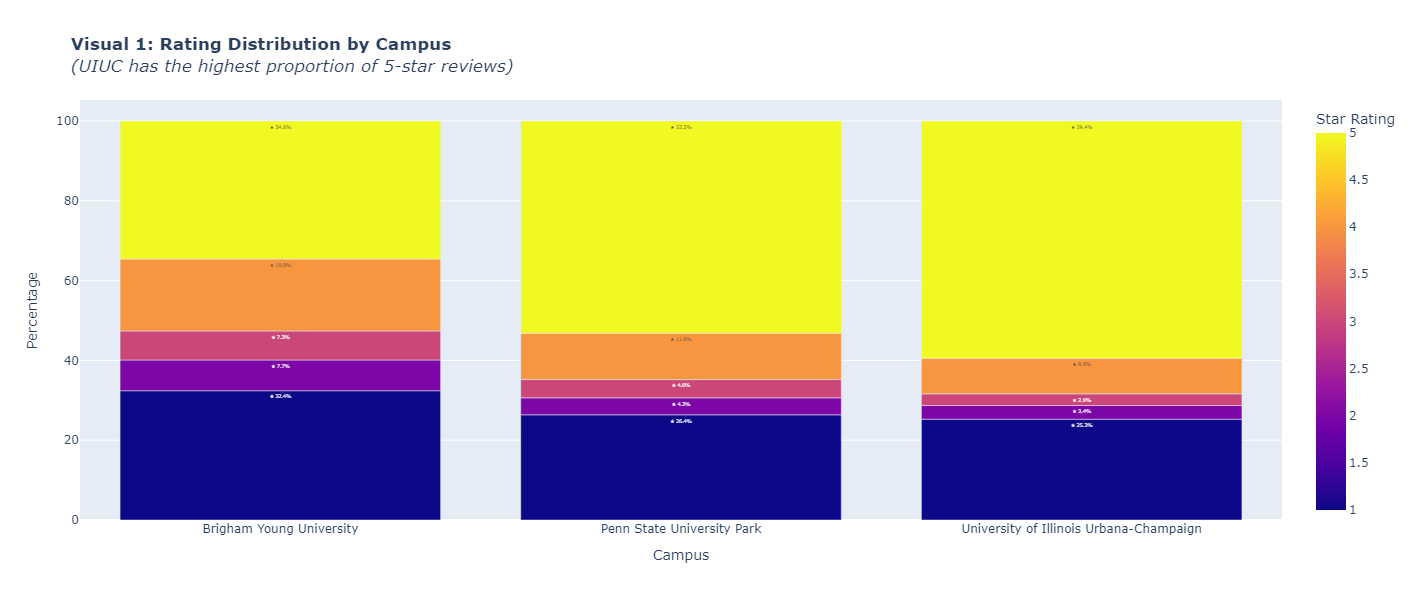

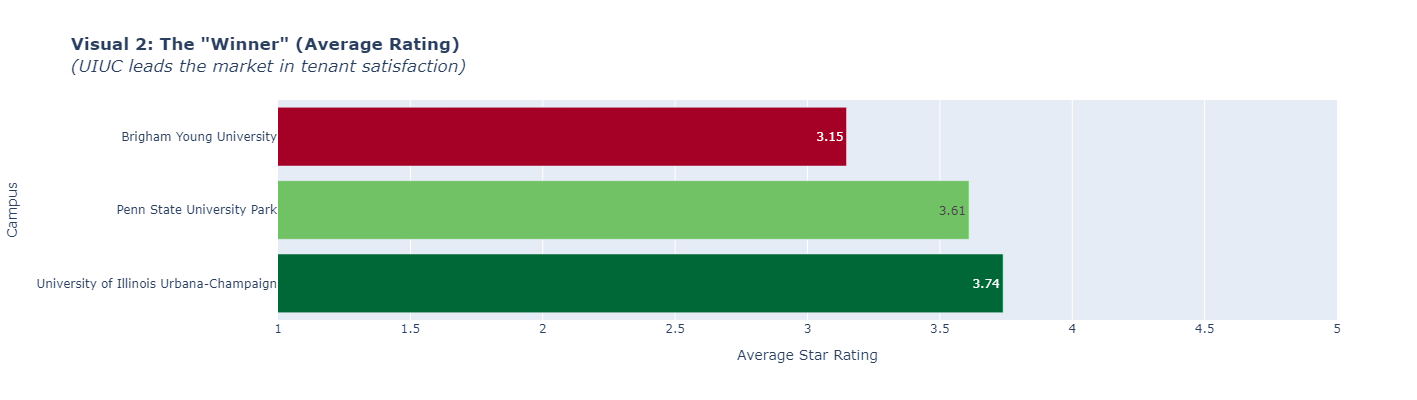

C:\Users\lalit\AppData\Local\Temp\ipykernel_11580\1246450645.py:47: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



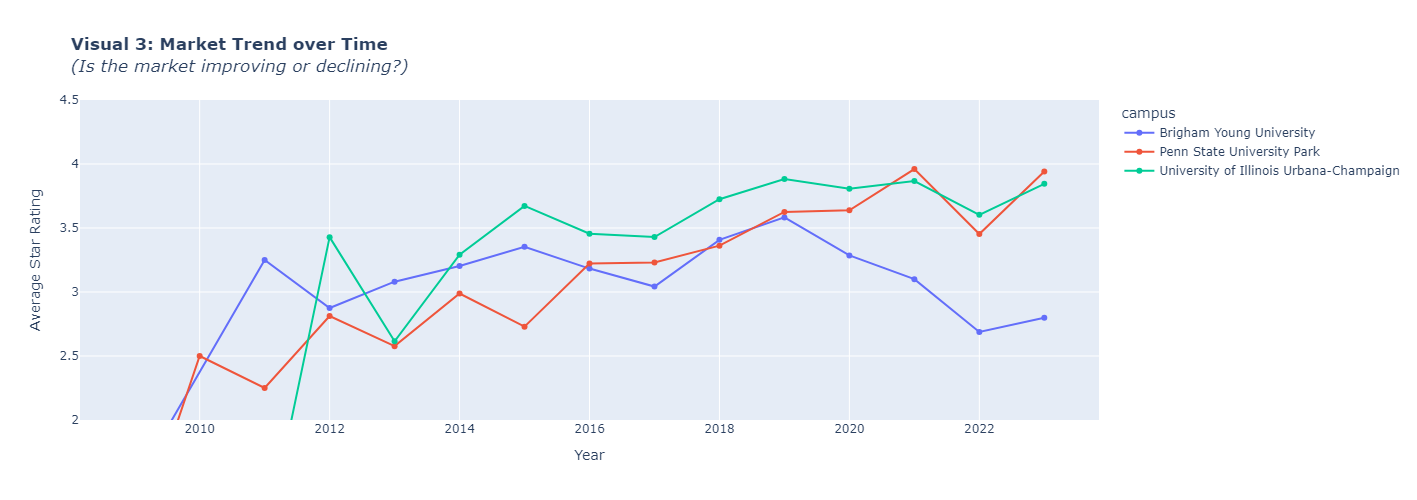

In [12]:
import pandas as pd
import plotly.express as px

# --- VISUAL 1: The Breakdown (100% Stacked Bar) ---
# Matches "Sample Format B" from Slide 8

# 1. Prepare Data
v1_data = df_main.groupby(['campus', 'review_rating']).size().reset_index(name='count')
v1_total = df_main.groupby('campus').size().reset_index(name='total')
v1_data = v1_data.merge(v1_total, on='campus')
v1_data['percentage'] = (v1_data['count'] / v1_data['total']) * 100
v1_data['label'] = "★ " + v1_data['percentage'].round(1).astype(str) + "%"

# 2. Plot
fig1 = px.bar(
    v1_data, x='campus', y='percentage', color='review_rating',
    title='<b>Visual 1: Rating Distribution by Campus</b><br><i>(UIUC has the highest proportion of 5-star reviews)</i>',
    labels={'campus': 'Campus', 'percentage': 'Percentage', 'review_rating': 'Star Rating'},
    color_discrete_map={1: '#EF553B', 2: '#FFA15A', 3: '#FFD700', 4: '#B5E48C', 5: '#00CC96'},
    category_orders={'review_rating': [1, 2, 3, 4, 5]},
    text='label'
)
fig1.update_layout(height=600, uniformtext_mode='hide')
fig1.show()

# --- VISUAL 2: The Scoreboard (Average Rating) ---

# 1. Prepare Data
v2_data = df_main.groupby('campus')['review_rating'].mean().reset_index().sort_values('review_rating', ascending=False)

# 2. Plot
fig2 = px.bar(
    v2_data, x='review_rating', y='campus', orientation='h',
    title='<b>Visual 2: The "Winner" (Average Rating)</b><br><i>(UIUC leads the market in tenant satisfaction)</i>',
    labels={'review_rating': 'Average Star Rating', 'campus': 'Campus'},
    color='review_rating', color_continuous_scale='RdYlGn',
    text_auto='.2f', range_x=[1, 5]
)
fig2.update_layout(height=400, coloraxis_showscale=False)
fig2.show()

# --- VISUAL 3: The Trend (Line Chart over Time) ---
# Matches "Sample Format A" from Slide 7

# 1. Prepare Data (Resample by Year)
# Note: Ensure review_datetime_utc is in datetime format before running
df_trend = df_main.set_index('review_datetime_utc').groupby([pd.Grouper(freq='Y'), 'campus'])['review_rating'].mean().reset_index()
df_trend['Year'] = df_trend['review_datetime_utc'].dt.year

# 2. Plot
fig3 = px.line(
    df_trend, x='Year', y='review_rating', color='campus',
    title='<b>Visual 3: Market Trend over Time</b><br><i>(Is the market improving or declining?)</i>',
    labels={'review_rating': 'Average Star Rating'},
    markers=True
)
fig3.update_layout(height=500, yaxis=dict(range=[2, 4.5]))
fig3.show()